**Importing libreries**

In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

Using TensorFlow backend.


**Reading data**

In [3]:
#read in training data
train_df = pd.read_csv('diabetes_data.csv')

#view data structure
train_df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#create a dataframe with all training data except the target column
train_X = train_df.drop(columns=['diabetes'])

#check that the target variable has been removed
train_X.head()
predict = train_X.head(5)
print(predict)

   pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age
0            6      148         72       35        0  33.6  0.627   50
1            1       85         66       29        0  26.6  0.351   31
2            8      183         64        0        0  23.3  0.672   32
3            1       89         66       23       94  28.1  0.167   21
4            0      137         40       35      168  43.1  2.288   33


In [5]:
#one-hot encode target column
train_y = to_categorical(train_df.diabetes)

#vcheck that target column has been converted
train_y[0:6]

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

**Creating the model**

In [6]:
import numpy as np
#create model
model = Sequential()

#get number of columns in training data
n_cols = train_X.shape[1]
print(n_cols)

#add layers to model
model.add(Dense(250, activation='relu', input_shape=(n_cols,)))
model.add(Dense(250, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(2, activation='softmax'))

#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
x=(train_X[:614])
y=(train_y[:614])
x_valid = (train_X[-172:])
y_valid=(train_y[-172:])




8






**Train the model **

In [7]:
#train model
history=model.fit(x, y,
          batch_size=32, epochs=30, shuffle=False,
          validation_data=(x_valid, y_valid))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 614 samples, validate on 172 samples
Epoch 1/30





614/614 [==============================] - 1s 1ms/step - loss: 1.4718 - acc: 0.5440 - val_loss: 0.7810 - val_acc: 0.5698
Epoch 2/30
614/614 [==============================] - 0s 270us/step - loss: 0.7249 - acc: 0.6140 - val_loss: 0.8787 - val_acc: 0.6105
Epoch 3/30
614/614 [==============================] - 0s 307us/step - loss: 0.6664 - acc: 0.6661 - val_loss: 0.7459 - val_acc: 0.6163
Epoch 4/30
614/614 [==============================] - 0s 308us/step - loss: 0.6412 - acc: 0.6580 - val_loss: 0.6946 - val_acc: 0.6105
Epoch 5/30
614/614 [==============================] - 0s 319us/step - loss: 0.6290 - acc: 0.6596 - val_loss: 0.7794 - val_acc: 0.6628
Epoch 6/30
614/614 [==============================] - 0s 321us/step - loss: 0.6265 - acc: 0.6889 - val_loss: 0.6676 - val_acc: 0.6686
Epoch 7/30
614/614 [==============================

**Evaluate the model**

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


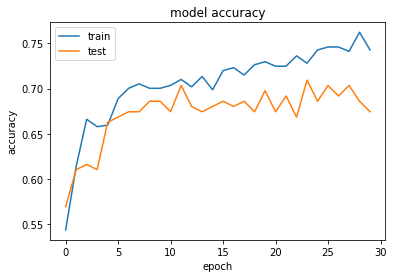

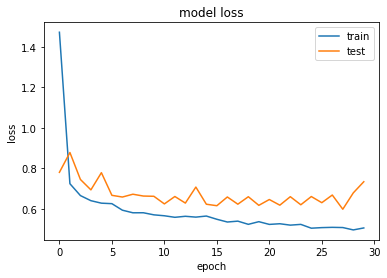

In [8]:
import matplotlib.pyplot as plt

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

**Make a prediction**

In [9]:
predict = pd.read_csv('to_prediction.csv')
predict.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
0,7,162,76,34,0,35.6,0.656,55
1,1,56,60,25,0,24.0,0.300,25
2,10,190,65,0,0,26.0,0.752,39
3,1,69,60,22,92,22.0,0.160,20
4,3,150,50,35,169,45.0,2.900,35


In [18]:
classes = model.predict_classes(predict)
print(classes)
for i in classes:
  if(i== 0):
    print("Not diabetic" +"\n")
  elif (i==1):
     print("Diabetic"+ "\n") 

[0 0 1 0 1]
Not diabetic

Not diabetic

Diabetic

Not diabetic

Diabetic

